In [1]:
import numpy as np
from ctapipe.io import EventSource
from ctapipe.visualization import CameraDisplay
import matplotlib.pyplot as plt
import os
from astropy.io import fits

In [ ]:
event_waveforms = {}
for filename in os.listdir('/Users/vdk/UnrealLST/waveforms/'):
    event_waveforms[filename[10:16]] = np.load('/Users/vdk/UnrealLST/waveforms/' + filename)

proton_waveforms = []
for filename2 in os.listdir('/Users/vdk/UnrealLST/waveformsProton/'):
    proton_waveforms.append(np.load('/Users/vdk/UnrealLST/waveformsProton/' + filename2, allow_pickle=True))


In [ ]:
# proton_waveforms = {}
# for filename2 in os.listdir('/Users/vdk/UnrealLST/waveformsProton/'):
#     print("filename =", filename2[16:22])
#     proton_waveforms[filename2[16:22]] = np.load('/Users/vdk/UnrealLST/waveformsProton/' + filename2, allow_pickle=True)

proton_waveforms = []
for filename2 in os.listdir('/Users/vdk/UnrealLST/waveformsProton/'):
    print("filename =", filename2[16:22])
    proton_waveforms.append(np.load('/Users/vdk/UnrealLST/waveformsProton/' + filename2, allow_pickle=True))

In [ ]:
# in 1st run we have two rings 5405008 and 4431008
filename = '/Users/vdk/simtel_corsika_theta_30.390_az_93.640_run1.simtel.gz'
source = EventSource(filename)
event_iterator = iter(source)

fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
fig.subplots_adjust(hspace=0.2)
ax = axes[0]

camgeom = source.subarray.tel[1].camera.geometry
#title=f"event{iter_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
title = '1'
disp = CameraDisplay(camgeom,title=title, ax = ax)
#disp.image = event.r1.tel[teln].waveform[:,11]
#disp.image = event.dl0.tel[teln].waveform[:,11]
disp.image = waveform.sum(axis = 1)
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
bx = axes[1]
for pix_id in range(0,1855):
    #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
    bx.plot(waveform[pix_id], label="pix {}".format(pix_id), drawstyle='steps')
plt.show()
#if i == 20:
#   break
plt.close()        

In [ ]:
for key in event_waveforms:
    fig, axes = plt.subplots(2, 1, sharex=False, gridspec_kw={'height_ratios': [1, 1]}, figsize=(9,12))
    fig.subplots_adjust(hspace=0.2)
    ax = axes[0]

    camgeom = source.subarray.tel[1].camera.geometry
    #title=f"event{iter_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
    title = '1'
    disp = CameraDisplay(camgeom,title=title, ax = ax)
    #disp.image = event.r1.tel[teln].waveform[:,11]
    #disp.image = event.dl0.tel[teln].waveform[:,11]
    disp.image = event_waveforms[key].sum(axis = 1)
    disp.cmap = plt.cm.RdBu_r
    disp.add_colorbar()
    disp.set_limits_percent(95)
    bx = axes[1]
    for pix_id in range(0,1855):
        #bx.plot(j.r0.tel[teln].waveform[0][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
        bx.plot(event_waveforms[key][pix_id], label="pix {}".format(pix_id), drawstyle='steps')
    plt.show()
    #if i == 20:
    #   break
    plt.close() 
    

In [ ]:
min_time = 9
max_time = 15

arr_max_muons = []
arg_max_muons = []

arr_max_muons_mask = []
arg_max_muons_mask = []

variance_muon = []

muon_n_pixel = []

for key in event_waveforms:
   tmp_var_muon = []
   if True:
      pixel_mask = np.array(np.max(event_waveforms[key], axis = 1) > 2, dtype = bool)
      for pixel in event_waveforms[key][pixel_mask]:
        arg_max_muons_mask.append(np.argmax(pixel))
      
      for pixel in event_waveforms[key][:, min_time:max_time]:
        tmp_var_muon.append(np.var(pixel))
   
   variance_muon.append(tmp_var_muon)
   

In [ ]:
event_waveforms = {}
for filename in os.listdir('/Users/vdk/UnrealLST/waveforms/'):
    event_waveforms[filename[10:16]] = np.load('/Users/vdk/UnrealLST/waveforms/' + filename)

proton_waveforms = []
for filename2 in os.listdir('/Users/vdk/UnrealLST/waveformsProton/'):
    proton_waveforms.append(np.load('/Users/vdk/UnrealLST/waveformsProton/' + filename2, allow_pickle=True))


min_time = 9
max_time = 15

arr_max_muons = []
arg_max_muons = []

arr_max_muons_mask = []
arg_max_muons_mask = []

variance_muon = []

muon_n_pixel = []

for key in event_waveforms:
   tmp_var_muon = []
   if True:
      pixel_mask = np.array(np.max(event_waveforms[key], axis = 1) > 2, dtype = bool)
      for pixel in event_waveforms[key][pixel_mask]:
        arg_max_muons_mask.append(np.argmax(pixel))
      
      for pixel in event_waveforms[key][:, min_time:max_time]:
        tmp_var_muon.append(np.var(pixel))
   
   variance_muon.append(tmp_var_muon)
   
arr_max_protons = []
arg_max_protons = []

arr_max_protons_mask = []
arg_max_protons_mask = []

variance_proton = []


for waveform in proton_waveforms:
   tmp_var_proton = []
   if True:
      pixel_mask = np.array(np.max(waveform, axis = 1) > 2, dtype = bool)
      for pixel in waveform[pixel_mask]:
        arg_max_protons_mask.append(np.argmax(pixel))
      
      for pixel in waveform[:, min_time:max_time]:
        tmp_var_proton.append(np.var(pixel))

   variance_proton.append(tmp_var_proton)

### Mean of the variance

In [ ]:
var_hist_m_short = [np.mean(np.array(item)) for item in variance_muon] # only for considered time span (7:12)
var_hist_p_short = [np.mean(np.array(item)) for item in variance_proton] # only for considered time span (7:12)
z,x,c = plt.hist(var_hist_p_short, alpha = 0.5, density = True, bins = 38, range=(0,1), label='protons')
z,x,c = plt.hist(var_hist_m_short, alpha = 0.5, density = True, bins = 38, range=(0,1), label='muons')

plt.grid(alpha = 0.5)
plt.legend()
plt.xlabel('Mean of variance per pixel for every event')
plt.ylabel('Number of events')
plt.title(f'Distribution of mean for variance per pixel for timebins [{min_time}:{max_time}]')
#plt.xticks((0.0,0.1,0.2,0.3,0.4))
xticks = np.linspace(0,1,11)
ticks = plt.xticks(xticks)
#plt.savefig("/Users/vdk/RealLST/images/Run14948_1_variance_R1cut2_7-11timebin.png")

In [ ]:
var_hist_m_short

In [ ]:
len(event_waveforms)

In [ ]:
print(sorted(var_hist_m_short))

### Time of max R1 waveform

In [ ]:
plt.figure(figsize=(7,5))
# Time distribution
k, z, l = plt.hist(arg_max_protons_mask, bins = 36, density = True, alpha = 0.35, label = 'protons')
k, z, l = plt.hist(arg_max_muons_mask, bins = 40, density = True, alpha = 0.35, label = 'muons')



plt.legend()
plt.xlabel("Time of max R1 amplitude")
plt.ylabel("Probability density")
plt.grid(alpha = 0.5)
#plt.savefig("/Users/vdk/RealLST/images/Run14948_1_timesample_R1cut3.png")


## Cleaning

### Sim cleaning

In [19]:
muon_file = '/Users/vdk/UnrealLST/output_clean17_mc/muon_table_run1.fits' 

In [20]:
hdul = fits.open(muon_file)
hdul.info()
opt_eff = []
containment = []
completeness = []
n_ring_pixels = []
event_id = []
efficiency_dict = {}
# element number 10 is muon efficiency, so in such way we can check it
for i in range(len(hdul[1].data)):
    #print(hdul[1].data[i])
    opt_eff.append(hdul[1].data[i][10])
    containment.append(hdul[1].data[i][11])
    completeness.append(hdul[1].data[i][12])
    n_ring_pixels.append(hdul[1].data[i][-4])
    event_id.append(hdul[1].data[i][0])
    efficiency_dict[hdul[1].data[i][0]] = hdul[1].data[i][10]

opt_eff = np.array(opt_eff)[~np.isnan(np.array(opt_eff))]

Filename: /Users/vdk/UnrealLST/output_clean17_mc/muon_table_run1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     54   8R x 23C   [K, D, D, E, E, D, D, D, D, L, D, D, D, D, D, D, D, D, D, K, D, D, D]   


In [13]:
print("Optical Efficiency value = ", round(np.mean(opt_eff),3))
print("Optical Efficiency relative std value = ", round(np.std(opt_eff)/len(opt_eff)**0.5,3))
print("Number of fitted muons = ", len(opt_eff))


Optical Efficiency value =  0.161
Optical Efficiency relative std value =  0.014
Number of fitted muons =  2


In [21]:
efficiency_dict

{678005: nan,
 678008: nan,
 802502: nan,
 1177701: 0.14097969968311103,
 1674509: nan,
 4379003: nan,
 5059703: nan,
 5405008: 0.18144122050677475}

In [77]:
opt_eff_sim_clean = []
containment = []
completeness = []
n_ring_pixels = []
event_id_sim_clean = []
muon_id = []
efficiency_dict_sim_clean = {}
for i in range(1,100):
    filename = f'/Users/vdk/UnrealLST/output_clean17_mc/muon_table_run{i}.fits'
    #print(filename)
    hdul = fits.open(filename)
    # element number 10 is muon efficiency, so in such way we can check it
    for i in range(len(hdul[1].data)):
        #print(hdul[1].data[i])
        #print(hdul[1].data[i][10])
        #opt_eff_2.append(hdul[1].data[i][10])
        containment.append(hdul[1].data[i][11])
        completeness.append(hdul[1].data[i][12])
        n_ring_pixels.append(hdul[1].data[i][-4])
        #event_id_sim_clean.append(hdul[1].data[i][0])
        if not np.isnan(hdul[1].data[i][10]):
            #print(hdul[1].data[i][10])
            event_id_sim_clean.append(hdul[1].data[i][0])
            opt_eff_sim_clean.append(hdul[1].data[i][10])
            muon_id.append(hdul[1].data[i][0])
            efficiency_dict_sim_clean[hdul[1].data[i][0]] = hdul[1].data[i][10]

opt_eff_2 = np.array(opt_eff_2)
opt_eff_2 = opt_eff_2[np.logical_not(np.isnan(opt_eff_2))]

In [29]:
len(efficiency_dict_sim_clean)

71

In [15]:
print(np.mean(opt_eff_2))
print(len(opt_eff_2))
print(muon_id)
print(len(muon_id))

0.16005750286903955
71
[1177701, 5405008, 2385808, 223806, 4682002, 5046309, 2035807, 4042408, 78105, 1073405, 1724808, 5284808, 604109, 2619809, 138405, 1815005, 5117307, 3873407, 4901307, 1824304, 3214206, 5139408, 4099600, 5068404, 759808, 5508200, 610900, 5858809, 583303, 2281000, 5055206, 2147609, 475808, 2412203, 3280901, 5802708, 3539901, 860807, 2831301, 3718703, 5895006, 5034806, 55203, 1330202, 5387503, 4026706, 5266506, 5208607, 2700703, 2736603, 2505908, 1063003, 1673009, 5808709, 1823602, 4283908, 2864203, 1237307, 4400203, 4252600, 1591205, 998102, 3223201, 4898106, 5586609, 2355807, 1808703, 5992403, 1701104, 5097302, 2482107]
71


71
0.16005750286903955


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_25656/2028612381.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]


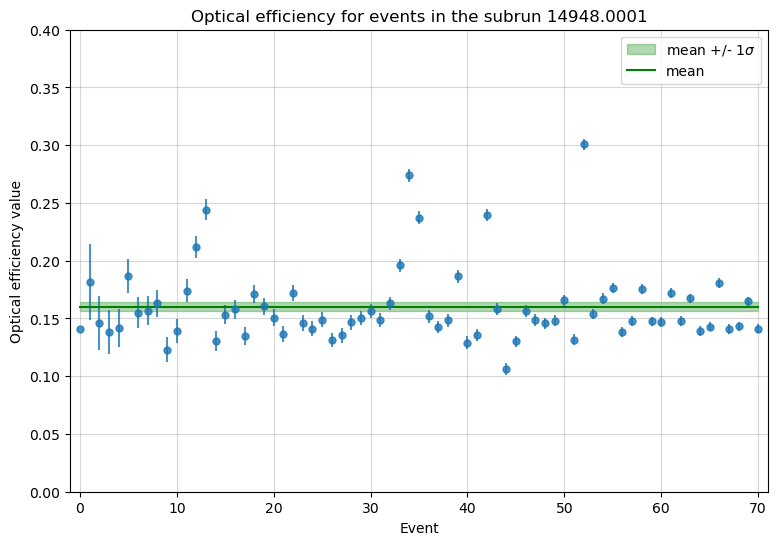

In [16]:
opt_eff = opt_eff_2
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]
#y_mid = [np.mean(nice_opt_eff[:i+1]) for i in range(len(nice_opt_eff[:i+1]))]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff))]




#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]
#std_arr_big = [np.std(opt_eff) for i,j in enumerate(opt_eff)]

#std_arr_3 = [np.std(new_plot)/i**0.5 for i,j in enumerate(new_plot)]
#std_arr_3_big = [np.std(new_plot) for i,j in enumerate(new_plot)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]


plt.figure(figsize = (9,6))
#plt.ylim(0.05,0.3)
#plt.ylim(0.095,0.265)
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency value")
#plt.title("Opt eff for muon rings after time sample cleaning, pix > 50, intensity<0.2")
plt.title("Optical efficiency for events in the subrun 14948.0001")
#plt.title("Events after island cleaning (size $\leq 4$)")


plt.grid(alpha=0.5)
plt.ylim(0,0.4)
#plt.scatter(new_ind, new_plot, color = 'orange')


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

plt.errorbar(x_range, opt_eff, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="")#, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')

#plt.scatter(new_ind, new_plot, alpha = 0.9, color = "orange", label="original") #, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(mean_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
#plt.plot(mean_range, y_mid, label = "mean", lw = 1.5, color='green')

#plt.plot(x_range, y_mid, label = "mean", lw = 1.5, color='green')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'r', alpha = 0.3, label = 'mean +/- $1\sigma$')

plt.xlim(-1,len(opt_eff))
plt.legend()
print(len(opt_eff))
print(np.mean(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/CleanedOptEff_pix>50_int=01_16timebin_complet>05_RelStdErr_fdsfs.png")
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

In [78]:
opt_eff_sim_raw = []
containment = []
completeness = []
n_ring_pixels = []
event_id_sim_raw = []
muon_id = []
efficiency_dict_sim_raw = {}
for i in range(1,100):
    filename = f'/Users/vdk/UnrealLST/muons_output_raw/muon_table_run{i}.fits'
    #print(filename)
    hdul = fits.open(filename)
    # element number 10 is muon efficiency, so in such way we can check it
    for i in range(len(hdul[1].data)):
        #print(hdul[1].data[i])
        #print(hdul[1].data[i][10])
        
        containment.append(hdul[1].data[i][11])
        completeness.append(hdul[1].data[i][12])
        n_ring_pixels.append(hdul[1].data[i][-4])
        #event_id_sim_raw.append(hdul[1].data[i][0])
        if not np.isnan(hdul[1].data[i][10]):
            opt_eff_sim_raw.append(hdul[1].data[i][10])
            #print(hdul[1].data[i][10])
            event_id_sim_raw.append(hdul[1].data[i][0])
            muon_id.append(hdul[1].data[i][0])
            efficiency_dict_sim_raw[hdul[1].data[i][0]] = hdul[1].data[i][10]

opt_eff_2 = np.array(opt_eff_2)
opt_eff_2 = opt_eff_2[np.logical_not(np.isnan(opt_eff_2))]

In [34]:
len(efficiency_dict_sim_raw)

53

53
0.16209451851385526


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_25656/3945038177.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]


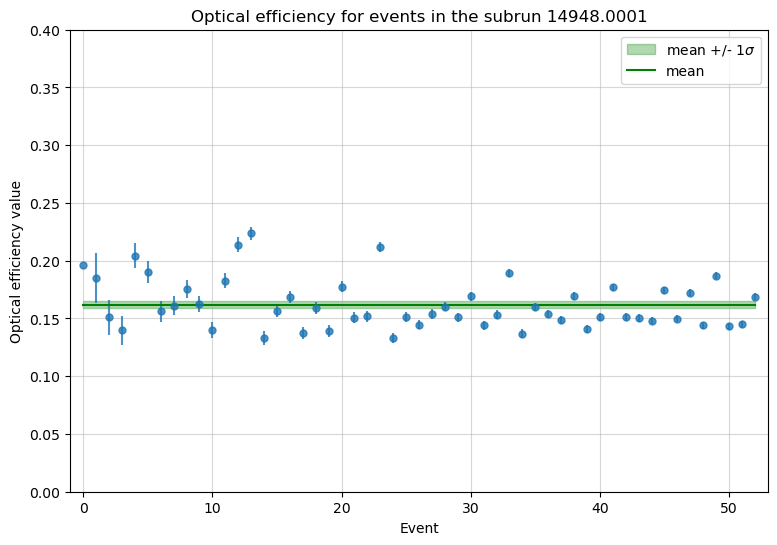

In [18]:
opt_eff = opt_eff_2
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]
#y_mid = [np.mean(nice_opt_eff[:i+1]) for i in range(len(nice_opt_eff[:i+1]))]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff))]




#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]
#std_arr_big = [np.std(opt_eff) for i,j in enumerate(opt_eff)]

#std_arr_3 = [np.std(new_plot)/i**0.5 for i,j in enumerate(new_plot)]
#std_arr_3_big = [np.std(new_plot) for i,j in enumerate(new_plot)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]


plt.figure(figsize = (9,6))
plt.ylim(0,0.4)
#plt.ylim(0.095,0.265)
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency value")
#plt.title("Opt eff for muon rings after time sample cleaning, pix > 50, intensity<0.2")
plt.title("Optical efficiency for events in the subrun 14948.0001")
#plt.title("Events after island cleaning (size $\leq 4$)")


plt.grid(alpha=0.5)
#plt.ylim(0.05,0.3)
#plt.scatter(new_ind, new_plot, color = 'orange')


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

plt.errorbar(x_range, opt_eff, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="")#, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')

#plt.scatter(new_ind, new_plot, alpha = 0.9, color = "orange", label="original") #, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(mean_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
#plt.plot(mean_range, y_mid, label = "mean", lw = 1.5, color='green')

#plt.plot(x_range, y_mid, label = "mean", lw = 1.5, color='green')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'r', alpha = 0.3, label = 'mean +/- $1\sigma$')

plt.xlim(-1,len(opt_eff))
plt.legend()
print(len(opt_eff))
print(np.mean(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/CleanedOptEff_pix>50_int=01_16timebin_complet>05_RelStdErr_fdsfs.png")
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

### Observations cleaning

In [184]:
muon_file = '/Users/vdk/RealLST/cleaning/muons_LST-1.Run14948.0001_15.fits'
hdul = fits.open(muon_file)
hdul.info()
opt_eff_obs_clean = []
event_id_obs_clean = []
efficiency_dict_obs_clean = {}
# element number 10 is muon efficiency, so in such way we can check it
for i in range(len(hdul[1].data)):
    if not np.isnan(hdul[1].data[i][10]):
        event_id_obs_clean.append(hdul[1].data[i][0])
        opt_eff_obs_clean.append(hdul[1].data[i][10])
        efficiency_dict_obs_clean[hdul[1].data[i][0]] = hdul[1].data[i][10]


Filename: /Users/vdk/RealLST/cleaning/muons_LST-1.Run14948.0001_15.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     54   72R x 23C   [K, D, K, E, E, D, D, D, D, L, D, D, D, D, D, D, D, D, D, K, D, K, K]   


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_25656/3682910908.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]


72


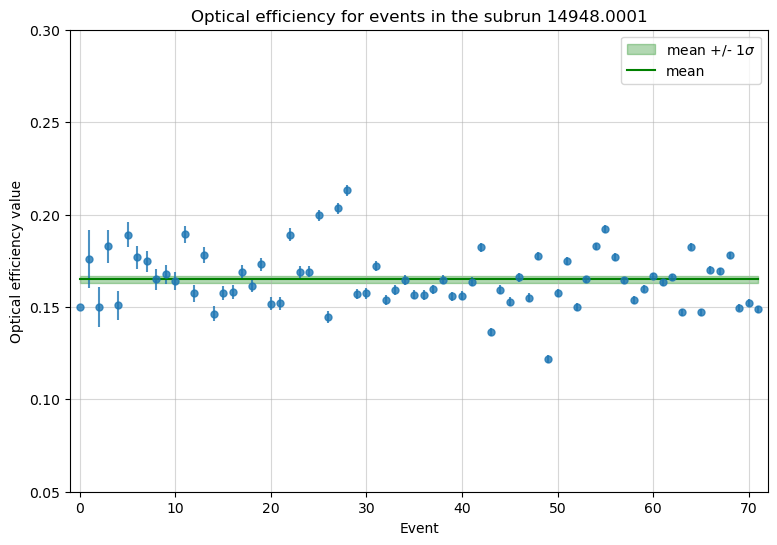

In [5]:
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]
#y_mid = [np.mean(nice_opt_eff[:i+1]) for i in range(len(nice_opt_eff[:i+1]))]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff))]




#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]
#std_arr_big = [np.std(opt_eff) for i,j in enumerate(opt_eff)]

#std_arr_3 = [np.std(new_plot)/i**0.5 for i,j in enumerate(new_plot)]
#std_arr_3_big = [np.std(new_plot) for i,j in enumerate(new_plot)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]


plt.figure(figsize = (9,6))
plt.ylim(0.05,0.3)
#plt.ylim(0.095,0.265)
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency value")
#plt.title("Opt eff for muon rings after time sample cleaning, pix > 50, intensity<0.2")
plt.title("Optical efficiency for events in the subrun 14948.0001")
#plt.title("Events after island cleaning (size $\leq 4$)")


plt.grid(alpha=0.5)
#plt.ylim(0.05,0.3)
#plt.scatter(new_ind, new_plot, color = 'orange')


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

plt.errorbar(x_range, opt_eff, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="")#, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')

#plt.scatter(new_ind, new_plot, alpha = 0.9, color = "orange", label="original") #, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(mean_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
#plt.plot(mean_range, y_mid, label = "mean", lw = 1.5, color='green')

#plt.plot(x_range, y_mid, label = "mean", lw = 1.5, color='green')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'r', alpha = 0.3, label = 'mean +/- $1\sigma$')

plt.xlim(-1,len(opt_eff))
plt.legend()
print(len(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/CleanedOptEff_pix>50_int=01_16timebin_complet>05_RelStdErr_fdsfs.png")
plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

In [186]:
muon_file = muon_file = '/Users/vdk/RealLST/muons_LST-1.Run14948.0001.fits'
hdul = fits.open(muon_file)
hdul.info()
opt_eff_obs_raw = []
event_id_obs_raw = []
efficiency_dict_obs_raw = {}
# element number 10 is muon efficiency, so in such way we can check it
for i in range(len(hdul[1].data)):
    if not np.isnan(hdul[1].data[i][10]):
        event_id_obs_raw.append(hdul[1].data[i][0])
        opt_eff_obs_raw.append(hdul[1].data[i][10])
        efficiency_dict_obs_raw[hdul[1].data[i][0]] = hdul[1].data[i][10]

Filename: /Users/vdk/RealLST/muons_LST-1.Run14948.0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     54   68R x 23C   [K, D, K, E, E, D, D, D, D, L, D, D, D, D, D, D, D, D, D, K, D, K, K]   


68


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_25656/1096477049.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]


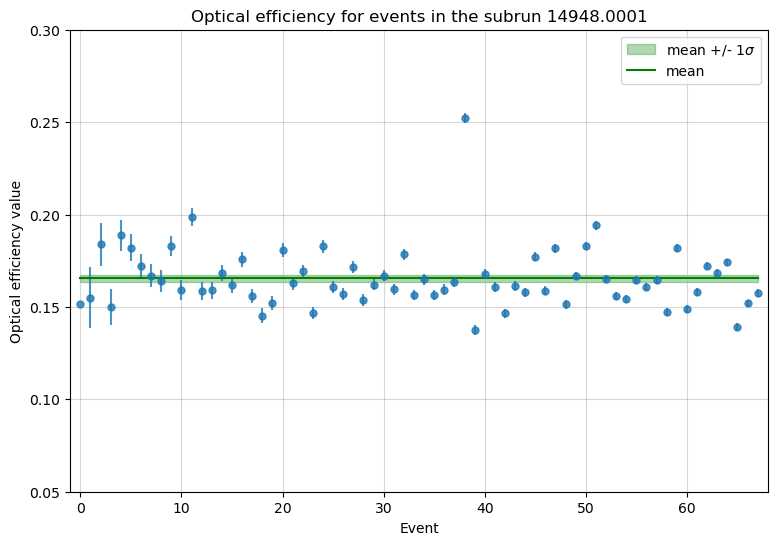

In [10]:
opt_eff = opt_eff_raw
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]
#y_mid = [np.mean(nice_opt_eff[:i+1]) for i in range(len(nice_opt_eff[:i+1]))]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff))]




#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]
#std_arr_big = [np.std(opt_eff) for i,j in enumerate(opt_eff)]

#std_arr_3 = [np.std(new_plot)/i**0.5 for i,j in enumerate(new_plot)]
#std_arr_3_big = [np.std(new_plot) for i,j in enumerate(new_plot)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]


plt.figure(figsize = (9,6))
plt.ylim(0.05,0.3)
#plt.ylim(0.095,0.265)
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency value")
#plt.title("Opt eff for muon rings after time sample cleaning, pix > 50, intensity<0.2")
plt.title("Optical efficiency for events in the subrun 14948.0001")
#plt.title("Events after island cleaning (size $\leq 4$)")


plt.grid(alpha=0.5)
#plt.ylim(0.05,0.3)
#plt.scatter(new_ind, new_plot, color = 'orange')


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

plt.errorbar(x_range, opt_eff, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="")#, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')

#plt.scatter(new_ind, new_plot, alpha = 0.9, color = "orange", label="original") #, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(mean_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
#plt.plot(mean_range, y_mid, label = "mean", lw = 1.5, color='green')

#plt.plot(x_range, y_mid, label = "mean", lw = 1.5, color='green')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'r', alpha = 0.3, label = 'mean +/- $1\sigma$')

plt.xlim(-1,len(opt_eff))
plt.legend()
print(len(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/CleanedOptEff_pix>50_int=01_16timebin_complet>05_RelStdErr_fdsfs.png")
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

In [ ]:
flag_waveforms = {}
for filename in os.listdir('/Users/vdk/UnrealLST/waveforms_flag/'):
    #print("filename =", filename[20:28])
    flag_waveforms[filename[20:28]] = np.load('/Users/vdk/UnrealLST/waveforms_flag/' + filename, allow_pickle = True)

In [ ]:
os.listdir('/Users/vdk/UnrealLST/waveforms_flag/')[0][20:26]

In [ ]:
iter = 0
for key in flag_waveforms:
    if iter > 500:
        camgeom = source.subarray.tel[1].camera.geometry
        #title=f"event{iter_number}_fit{round(j.muon.tel[teln].efficiency.optical_efficiency,3)}_width{round(j.muon.tel[teln].efficiency.width.to_value(),3)}"
        title = f'{key}'
        disp = CameraDisplay(camgeom,title=title)
        #disp.image = event.r1.tel[teln].waveform[:,11]
        #disp.image = event.dl0.tel[teln].waveform[:,11]
        disp.image = flag_waveforms[key].sum(axis = 1)
        disp.cmap = plt.cm.RdBu_r

        disp.add_colorbar()
        disp.set_limits_percent(95)
        plt.show()
        #if i == 20:
        #   break
    iter += 1

plt.close() 
    

In [ ]:
arr = [4431008, 5405008, 2385808, 223806, 4682002, 5046309, 2035807, 4042408, 78105, 5900905, 1724808, 5284808, 4820906, 604109, 138405, 1815005, 5117307, 3873407, 3214206, 3277304, 4099600, 5068404, 5508200, 3149405, 610900, 583303, 5543408, 2281000, 5055206, 2147609, 475808, 860807, 2831301, 3718703, 5034806, 1330202, 5208607, 2700703, 2505908, 2864203, 1237307, 4400203, 4554001, 4252600, 1591205, 998102, 3223201, 4898106, 2355807, 1808703, 5992403, 1701104, 5097302,5333507, 1673009, 1808303, 3362305, 2835508, 4026706, 159503, 4854202, 5464504, 2439702, 1402200, 3456509, 3547004, 2229705, 22604, 5573308, 3489206, 417000, 5895006, 1836008, 1794401, 593906, 3280901, 1114103, 5920700, 5521903, 5240406, 5678007, 918003, 5858809, 4315801, 3547006, 729206, 5412204, 759808, 3386907, 2597005, 3539901, 4125904, 1073405, 3662503, 846606, 2845905, 5139408, 5097001, 3248609, 2257305, 5559707, 1775404, 5586609, 5387503, 336801, 3611003, 4504102, 1556201, 3742006, 55203, 377809, 5303909, 3393108, 5854105, 3850800, 5240903, 5120108, 4330605, 4006201, 4752000, 817501, 1096109, 5562603, 3289408, 2057308, 1646106, 2736603, 220203, 2095301, 243205, 250008, 728702, 1177701, 402700, 4589808, 1063003, 3804102, 1088507, 5638409, 1824304, 2482107, 2619809, 4647903, 5864908, 4805401, 2936707, 996201]

In [39]:
print(len(efficiency_dict_sim_clean))
print(len(efficiency_dict_sim_raw))

71
53


In [38]:
print(len(efficiency_dict_obs_clean))
print(len(efficiency_dict_obs_raw))

72
68


In [63]:
sim_clean_dict = []
sim_raw_dict = []
sim_both_dict = []



In [131]:
sim_clean_keys = set(list(efficiency_dict_sim_clean.keys()))
sim_raw_keys = set(list(efficiency_dict_sim_raw.keys()))
sim_both = sim_clean_keys & sim_raw_keys
sim_clean = sim_clean_keys - sim_raw_keys
sim_raw = sim_raw_keys - sim_clean_keys

len(sim_raw_keys)

53

[78105, 138405, 223806, 475808, 583303, 604109, 610900, 860807, 998102, 1237307, 1330202, 1591205, 1701104, 1724808, 1808703, 1815005, 2035807, 2147609, 2281000, 2355807, 2385808, 2505908, 2700703, 2831301, 2864203, 3149405, 3214206, 3223201, 3277304, 3718703, 3873407, 4042408, 4099600, 4252600, 4400203, 4431008, 4554001, 4682002, 4820906, 4898106, 5034806, 5046309, 5055206, 5068404, 5097302, 5117307, 5208607, 5284808, 5405008, 5508200, 5543408, 5900905, 5992403]
[55203, 78105, 138405, 223806, 475808, 583303, 604109, 610900, 759808, 860807, 998102, 1063003, 1073405, 1177701, 1237307, 1330202, 1591205, 1673009, 1701104, 1724808, 1808703, 1815005, 1823602, 1824304, 2035807, 2147609, 2281000, 2355807, 2385808, 2412203, 2482107, 2505908, 2619809, 2700703, 2736603, 2831301, 2864203, 3214206, 3223201, 3280901, 3539901, 3718703, 3873407, 4026706, 4042408, 4099600, 4252600, 4283908, 4400203, 4682002, 4898106, 4901307, 5034806, 5046309, 5055206, 5068404, 5097302, 5117307, 5139408, 5208607, 5266

In [116]:
res_dict = {event_id_sim_raw[i]:opt_eff_sim_raw[i] for i in range(len(opt_eff_sim_raw))}
# dictionary with event:opticalefficiency for cleaned events
res_dict_cleaned = {event_id_sim_clean[i]:opt_eff_sim_clean[i] for i in range(len(opt_eff_sim_clean))}
print(len(res_dict))
print(len(res_dict_cleaned))

plot = []
for i in res_dict_cleaned.keys():
    if i in res_dict.keys():
        plot.append(res_dict[i])
    else:
        plot.append(0)

new_plot = []
new_ind = []
new_std = []
for i,j in enumerate(plot):
    if not j == 0:
        new_plot.append(j)
        new_ind.append(i)
        new_std.append(np.std(opt_eff))
        


        
print("len of remained = ", len(new_plot))
#print("len of all = ", len(nice_opt_eff))

# cumulative_dif = 0

# for i in res_dict:
#     if i in res_dict_cleaned:
#         cumulative_dif += abs(res_dict[i] - res_dict_cleaned[i])

# print("cumulative_dif = ", cumulative_dif)

# print("relative cumulative_dif = ", cumulative_dif/len(new_plot))

53
71
len of remained =  46


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_25656/1637447065.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]


53
0.16209451851385526


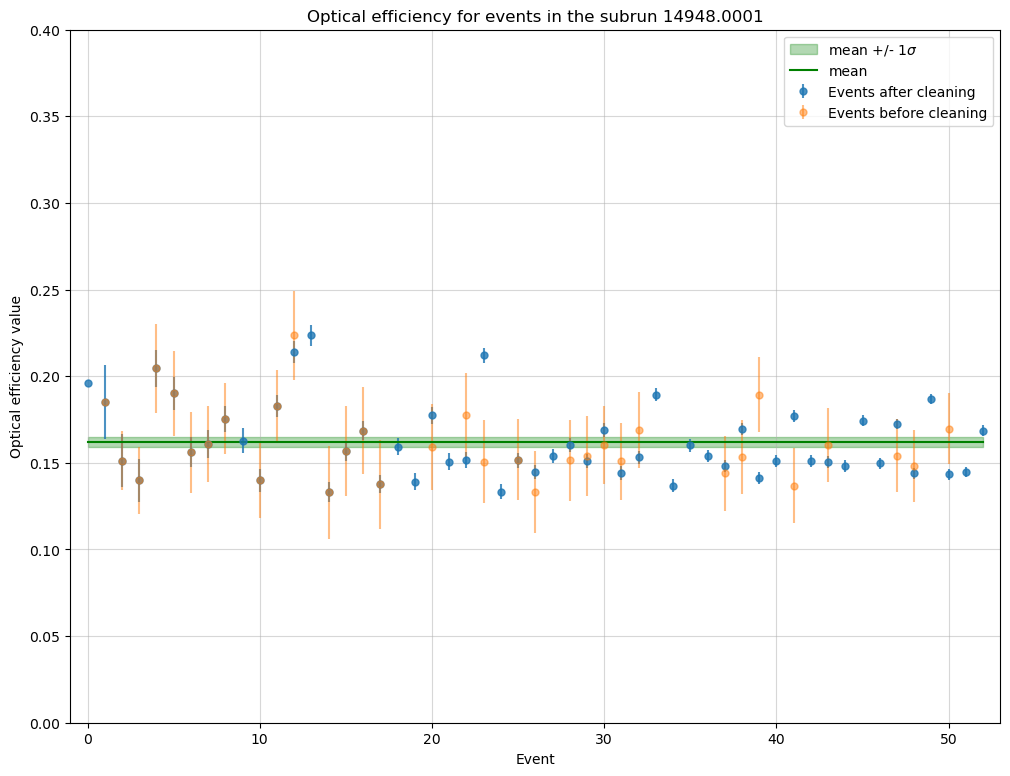

In [94]:
opt_eff = opt_eff_2
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]
#y_mid = [np.mean(nice_opt_eff[:i+1]) for i in range(len(nice_opt_eff[:i+1]))]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff))]




#std_arr = [np.std(optical_coef)/np.mean(optical_coef) for i,j in enumerate(optical_coef)]
std_arr = [np.std(opt_eff)/i**0.5 for i,j in enumerate(opt_eff)]
#std_arr_big = [np.std(opt_eff) for i,j in enumerate(opt_eff)]

#std_arr_3 = [np.std(new_plot)/i**0.5 for i,j in enumerate(new_plot)]
#std_arr_3_big = [np.std(new_plot) for i,j in enumerate(new_plot)]
#std_arr = [np.std(opt_eff) for i,j in enumerate(opt_eff)]


plt.figure(figsize = (12,9))
#plt.ylim(0.05,0.3)
#plt.ylim(0.095,0.265)
plt.xlabel("Event")
#plt.ylabel("Optical eff with rel. error for 1 measurment")
plt.ylabel("Optical efficiency value")
#plt.title("Opt eff for muon rings after time sample cleaning, pix > 50, intensity<0.2")
plt.title("Optical efficiency for events in the subrun 14948.0001")
#plt.title("Events after island cleaning (size $\leq 4$)")


plt.grid(alpha=0.5)
plt.ylim(0,0.4)
#plt.scatter(new_ind, new_plot, color = 'orange')


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

plt.errorbar(x_range, opt_eff, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="Events after cleaning")#, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='o', ms = 5, alpha = 0.8, label="original") #, c = 'blue')#, s = 100)#, c= 'black')
#plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.5, label="original") #, c = 'blue')#, s = 100)#, c= 'black')

plt.errorbar(new_ind, new_plot, yerr=new_std, fmt='o', ms = 5, alpha = 0.5, label="Events before cleaning")
#plt.scatter(new_ind, new_plot, alpha = 0.9, color = "orange", label="original") #, c = 'blue')#, s = 100)#, c= 'black')


#plt.fill_between(mean_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
#plt.plot(mean_range, y_mid, label = "mean", lw = 1.5, color='green')

#plt.plot(x_range, y_mid, label = "mean", lw = 1.5, color='green')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

#plt.fill_between(x_range_1, y_upper_1, y_lower_1, color = 'r', alpha = 0.3, label = 'mean +/- $1\sigma$')

plt.xlim(-1,len(opt_eff))
plt.legend()
print(len(opt_eff))
print(np.mean(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/CleanedOptEff_pix>50_int=01_16timebin_complet>05_RelStdErr_fdsfs.png")
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

In [226]:
# dictionary with event:opticalefficiency for raw events
res_dict = {event_id_sim_raw[i]:opt_eff_sim_raw[i] for i in range(len(opt_eff_sim_raw))}
# dictionary with event:opticalefficiency for cleaned events
res_dict_cleaned = {event_id_sim_clean[i]:opt_eff_sim_clean[i] for i in range(len(opt_eff_sim_clean))}


plot = []
only_raw_key = []

for i in res_dict_cleaned.keys():
    if i in res_dict.keys():
        plot.append(res_dict[i])
    else:
        only_raw_key.append(i)
        plot.append(0)

new_plot = []
new_ind = []
new_std = []

for i,j in enumerate(plot):
    if not j == 0:
        new_plot.append(j)
        new_ind.append(i)
        new_std.append(np.std(new_plot))


only_clean_ind = []
only_clean_val = []
only_clean_std = []
for i,j in enumerate(opt_eff_sim_clean):
    if i not in new_ind:
        only_clean_ind.append(i)
        only_clean_val.append(j)
        only_clean_std.append(np.std(opt_eff))


both_clean_ind = []
both_clean_val = []
both_clean_std = []

for i,j in enumerate(opt_eff_sim_clean):
    if i in new_ind:
        both_clean_ind.append(i)
        both_clean_val.append(j)
        both_clean_std.append(np.std(opt_eff))



In [227]:
len(only_raw_key)

25

53
0.16209451851385526


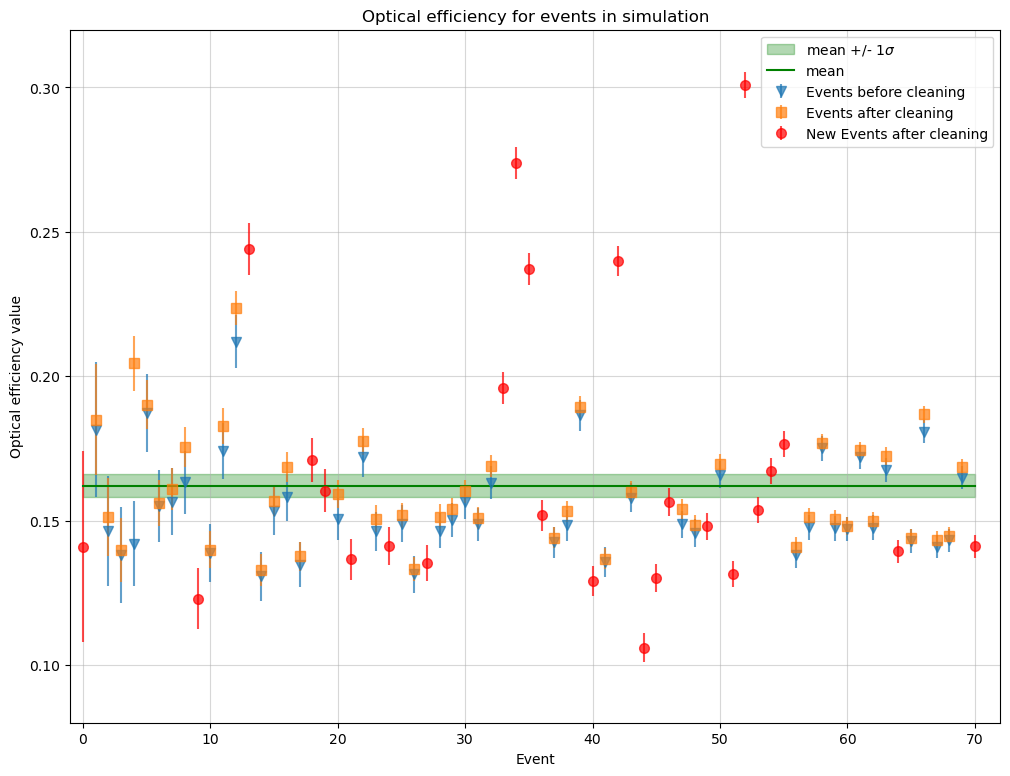

In [230]:
opt_eff = opt_eff_2
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff_sim_clean))]




std_arr = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i,j in enumerate(opt_eff_sim_clean)]
std_arr_3 = [np.std(new_plot)/(i+1)**0.5 for i,j in enumerate(new_plot)]
std_arr_4 = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i in only_clean_ind]
std_arr_5 = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i in both_clean_ind]


plt.figure(figsize = (12,9))
plt.xlabel("Event")
plt.ylabel("Optical efficiency value")
plt.title("Optical efficiency for events in simulation")


plt.grid(alpha=0.5)
plt.ylim(0.08,0.32)


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff) for i in x_range])]

#plt.errorbar(x_range, opt_eff_sim_clean, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="Events before cleaning")#, c = 'blue')#, s = 100)#, c= 'black')
plt.errorbar(both_clean_ind, both_clean_val, yerr=std_arr_5, fmt='v', ms = 7, alpha = 0.7, label="Events before cleaning")#, c = 'blue')#, s = 100)#, c= 'black')

plt.errorbar(new_ind, new_plot, yerr=std_arr_3, fmt='s', ms = 7, alpha = 0.7, label="Events after cleaning")
plt.errorbar(only_clean_ind, only_clean_val, yerr=std_arr_4, fmt='o', ms = 7, alpha = 0.7, color = 'red', label="New Events after cleaning")

plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.plot(x_range, [np.mean(opt_eff) for i in x_range], label = "mean", lw = 1.5, color='green')

plt.xlim(-1,len(opt_eff_sim_clean)+1)
plt.legend()
print(len(opt_eff))
print(np.mean(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)

In [147]:
len(opt_eff_sim_clean)

71

In [231]:
# dictionary with event:opticalefficiency for raw events
res_dict = {event_id_obs_raw[i]:opt_eff_obs_raw[i] for i in range(len(opt_eff_obs_raw))}
# dictionary with event:opticalefficiency for cleaned events
res_dict_cleaned = {event_id_obs_clean[i]:opt_eff_obs_clean[i] for i in range(len(opt_eff_obs_clean))}


plot = []
only_raw_key = []

for i in res_dict_cleaned.keys():
    if i in res_dict.keys():
        plot.append(res_dict[i])
    else:
        only_raw_key.append(i)
        plot.append(0)

both_raw_val = []
both_raw_ind = []
both_raw_std = []

for i,j in enumerate(plot):
    if not j == 0:
        both_raw_val.append(j)
        both_raw_ind.append(i)
        both_raw_std.append(np.std(both_raw_val))


only_clean_ind = []
only_clean_val = []
only_clean_std = []
for i,j in enumerate(opt_eff_obs_clean):
    if i not in both_raw_ind:
        only_clean_ind.append(i)
        only_clean_val.append(j)
        only_clean_std.append(np.std(opt_eff_obs_clean))


both_clean_ind = []
both_clean_val = []
both_clean_std = []

for i,j in enumerate(opt_eff_obs_clean):
    if i in both_raw_ind:
        both_clean_ind.append(i)
        both_clean_val.append(j)
        both_clean_std.append(np.std(opt_eff_obs_clean))

print(both_clean_ind)

[0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71]


53
0.16209451851385526


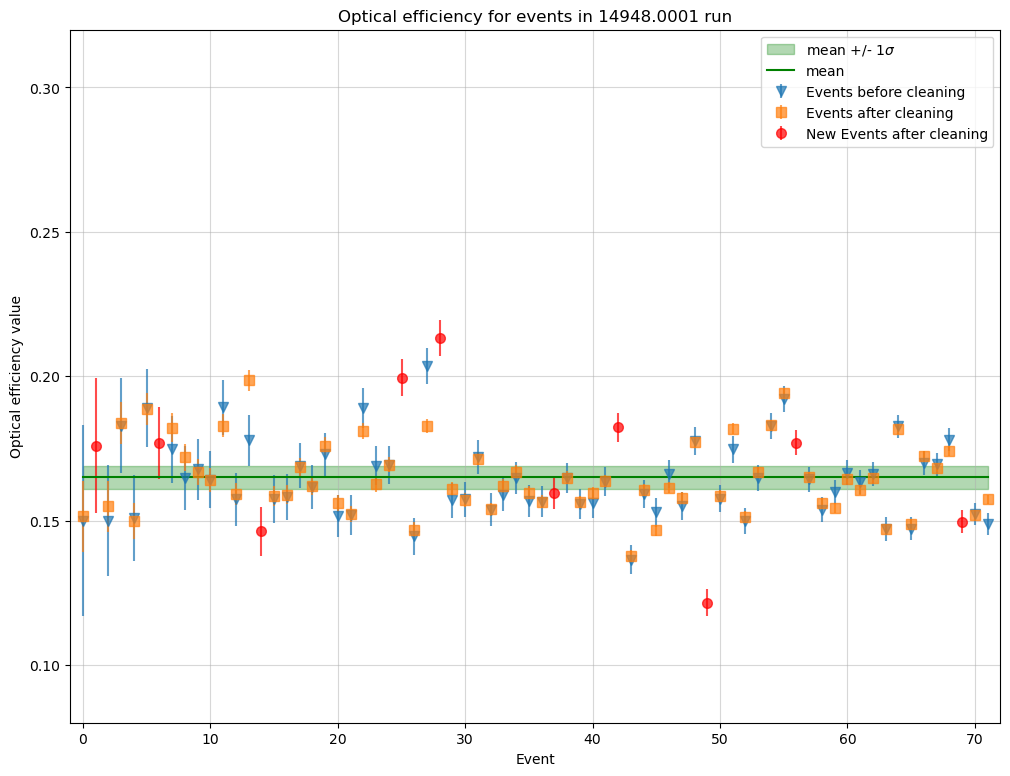

In [232]:
opt_eff = opt_eff_2
mean_range = [i-1 for i in range(len(opt_eff)+2)]
y_mid = [np.mean(opt_eff) for i in mean_range]

y_upper = [np.mean(opt_eff)+np.std(opt_eff) for i in mean_range]
y_lower = [np.mean(opt_eff)-np.std(opt_eff) for i in mean_range]

x_range = [i for i in range(len(opt_eff_obs_clean))]




std_arr = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i,j in enumerate(opt_eff_sim_clean)]
std_arr_3 = [np.std(both_raw_val)/(i+1)**0.5 for i,j in enumerate(both_raw_val)]
std_arr_4 = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i in only_clean_ind]
std_arr_5 = [np.std(opt_eff_sim_clean)/(i+1)**0.5 for i in both_clean_ind]


plt.figure(figsize = (12,9))
plt.xlabel("Event")
plt.ylabel("Optical efficiency value")
plt.title("Optical efficiency for events in 14948.0001 run")


plt.grid(alpha=0.5)
plt.ylim(0.08,0.32)


#y_upper = [j+std_arr[-1] for i,j in enumerate(y_mid)]
#y_lower = [j-std_arr[-1] for i,j in enumerate(y_mid)]


y_upper = [j+std_arr[-1] for i,j in enumerate([np.mean(opt_eff_obs_clean) for i in x_range])]
y_lower = [j-std_arr[-1] for i,j in enumerate([np.mean(opt_eff_obs_clean) for i in x_range])]

#plt.errorbar(x_range, opt_eff_sim_clean, yerr=std_arr, fmt='o', ms = 5, alpha = 0.8, label="Events before cleaning")#, c = 'blue')#, s = 100)#, c= 'black')


plt.errorbar(both_clean_ind, both_clean_val, yerr=std_arr_5, fmt='v', ms = 7, alpha = 0.7, label="Events before cleaning")#, c = 'blue')#, s = 100)#, c= 'black')

plt.errorbar(both_raw_ind, both_raw_val, yerr=std_arr_3, fmt='s', ms = 7, alpha = 0.7, label="Events after cleaning")


plt.errorbar(only_clean_ind, only_clean_val, yerr=std_arr_4, fmt='o', ms = 7, alpha = 0.7, color = 'red', label="New Events after cleaning")

plt.fill_between(x_range, y_upper, y_lower, alpha = 0.3, color = 'green', label = 'mean +/- $1\sigma$')
plt.plot(x_range, [np.mean(opt_eff_obs_clean) for i in x_range], label = "mean", lw = 1.5, color='green')

plt.xlim(-1,len(opt_eff_obs_clean))
plt.legend()
print(len(opt_eff))
print(np.mean(opt_eff))
#plt.savefig("/Users/vdk/ImagePurgatorium/LST1_14948_OptEffRaw.png", dpi=900)